In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# <center>Read data Files</center>

In [4]:
lc_train_data = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_train_data.dat', sep=" ", header=None)
lc_train_label = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_train_label.dat', header=None)
lc_test_data = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_test_data.dat', sep=" ", header=None)
lc_test_label = pd.read_csv('exercise-02/q1_leastSquare_linear_classifier_python/lc_test_label.dat', header=None)

lc_train_data = np.array(lc_train_data)
lc_test_data = np.array(lc_test_data)
lc_train_label = np.array(lc_train_label)
lc_test_label = np.array(lc_test_label)


# <center>Vizualize data</center>

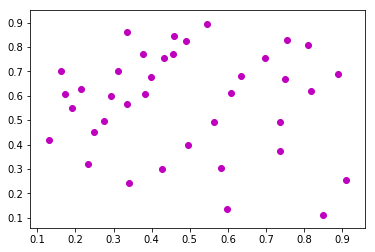

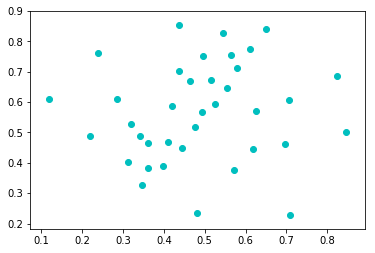

In [5]:
plt.scatter(lc_train_data[:,0],lc_train_data[:,1],c='m')
plt.show()
plt.scatter(lc_test_data[:,0],lc_test_data[:,1],c='c')
plt.show()

In [6]:
def leastSquares(data, label):
    data = np.insert(data,0,1,axis=1)
    weight = np.zeros((3,1))
    weight = np.matmul(np.linalg.pinv(data),label)
    return weight

In [15]:
def linclass(weight, data):
    data = np.insert(data,0,1,axis=1)
    class_pred = np.matmul(data,weight)
    class_pred[class_pred.flatten()>0,:] = 1
    class_pred[class_pred.flatten()<0,:] = -1
    return class_pred

In [16]:
weights_calculated = leastSquares(lc_train_data,lc_train_label)
labels_test_calculated = linclass(weights_calculated,lc_test_data)

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


# <center>Visualizing Classification for test data</center>

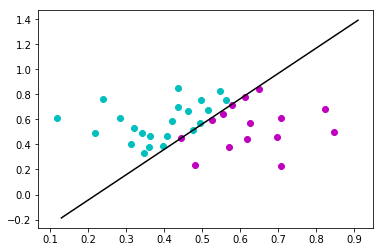

In [13]:
xmax = max(lc_train_data[:, 0])
xmin = min(lc_train_data[:, 0])
ymax = max(lc_train_data[:, 1])
ymin = min(lc_train_data[:, 1])

labels_test_calculated = labels_test_calculated.flatten()
plt.scatter(lc_test_data[labels_test_calculated[:]==1,0],lc_test_data[labels_test_calculated[:]==1,1],c='c')
plt.scatter(lc_test_data[labels_test_calculated[:]==-1,0],lc_test_data[labels_test_calculated[:]==-1,1],c='m')
plt.plot([xmin, xmax], [-(weights_calculated[1]*xmin+weights_calculated[0])/weights_calculated[2], -(weights_calculated[1]*xmax+weights_calculated[0])/weights_calculated[2]], c = 'k')
plt.show()

# <center>Visualizing Classification for train data</center>

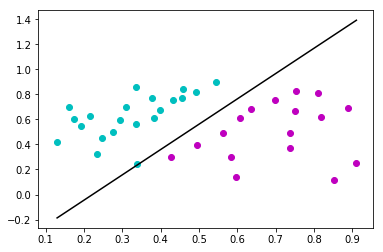

In [14]:
xmax = max(lc_train_data[:, 0])
xmin = min(lc_train_data[:, 0])
ymax = max(lc_train_data[:, 1])
ymin = min(lc_train_data[:, 1])

labels_train_calculated = linclass(weights_calculated,lc_train_data)
labels_train_calculated = labels_train_calculated.flatten()
plt.scatter(lc_train_data[labels_train_calculated[:]==1,0],lc_train_data[labels_train_calculated[:]==1,1],c='c')
plt.scatter(lc_train_data[labels_train_calculated[:]==-1,0],lc_train_data[labels_train_calculated[:]==-1,1],c='m')
plt.plot([xmin, xmax], [-(weights_calculated[1]*xmin+weights_calculated[0])/weights_calculated[2], -(weights_calculated[1]*xmax+weights_calculated[0])/weights_calculated[2]], c = 'k')
plt.show()